In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [156]:
# 加载数据
data = load_boston()
data_pd = pd.DataFrame(data.data,columns=data.feature_names)
data_pd['price'] = data.target

In [106]:
# 查看数据类型
data_pd.get_dtype_counts()

float64    14
dtype: int64

In [107]:
# 查看空值
data_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [108]:
# 查看数据大小
data_pd.shape

(506, 14)

In [109]:
# 查看数据描述
data_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [110]:
# 显示数据前5行
data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM：城市人均犯罪率

ZN：住宅用地所占比例

INDUS：城市中非商业用地所占尺寸

CHAS：查尔斯河虚拟变量

NOX：环保指数

RM：每栋住宅的房间数

AGE：1940年以前建成的自建单位的比例

DIS：距离5个波士顿就业中心的加权距离

RAD：距离高速公路的便利指数

TAX：每一万元的不动产税率

PTRATIO：城市中教师学生比例

B：城市中黑人比例

LSTAT：城市中有多少百分比的房东属于低收入阶层

price:自住房价格的中位数

In [111]:
# 计算所有特征和price的相关性，并画图
data_pd.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

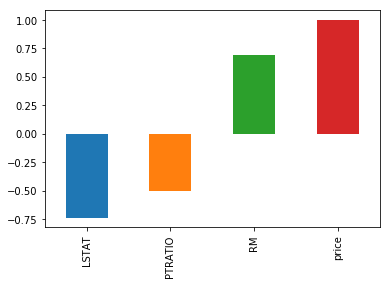

In [112]:
corr = data_pd.corr()
corr = corr['price']
corr[abs(corr)>0.5].sort_values().plot.bar()

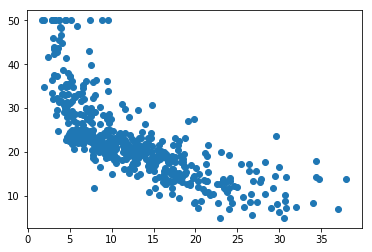

In [113]:
# LSTAT和price的散点图
plt.scatter(data_pd['LSTAT'],data_pd['price'])

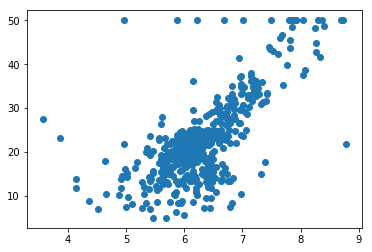

In [114]:
# RM和price的散点图
plt.scatter(data_pd['RM'],data_pd['price'])

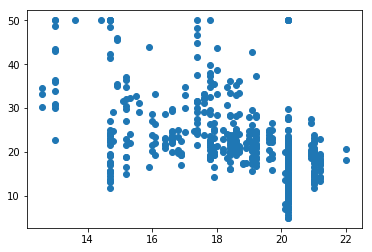

In [115]:
# PTRATIO和price的散点图
plt.scatter(data_pd['PTRATIO'],data_pd['price'])

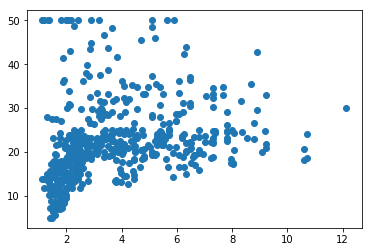

In [116]:
# DIS和price的散点图
plt.scatter(data_pd['DIS'],data_pd['price'])

In [157]:
# 制作训练集和测试集的数据
data_pd = data_pd[['LSTAT','PTRATIO','RM','price']]
y = np.array(data_pd['price'])
data_pd=data_pd.drop(['price'],axis=1)
X = np.array(data_pd)
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)

In [158]:
linreg = LinearRegression()
linreg.fit(train_X,train_Y)
y_predict = linreg.predict(test_X)
metrics.mean_squared_error(y_predict,test_Y)

22.258167990490282

### 加入归一化

In [159]:
train_X = preprocessing.scale(train_X)

In [160]:
linreg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
test_X = preprocessing.scale(test_X)
y_predict = linreg.predict(test_X)

In [162]:
metrics.mean_squared_error(y_predict,test_Y)

22.21683443251517

###  Lasso回归计算最重要的特征

In [80]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
from sklearn.metrics import r2_score

In [95]:
data = load_boston()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = np.array(data.target)

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=14)

In [97]:
model = LassoCV(cv=20).fit(X, y)

In [98]:
model.alpha_

0.7248204283772594

In [99]:
lasso = Lasso(max_iter=10000, alpha=model.alpha_)

In [100]:
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)

In [163]:
lasso.coef_

array([-0.05735935,  0.05190773, -0.        ,  0.        , -0.        ,
        2.02345913,  0.02554581, -0.69626584,  0.25975989, -0.01531205,
       -0.77482949,  0.00573684, -0.75441197])

In [164]:
lasso.intercept_

35.951395510062476

In [102]:
metrics.mean_squared_error(y_pred_lasso,test_Y)

113.83545145852216

### 重新加入特征计算

In [152]:
data = load_boston()
data_pd = pd.DataFrame(data.data,columns=data.feature_names)
data_pd['price'] = data.target

In [153]:
# 制作训练集和测试集的数据
data_pd = data_pd[['LSTAT','PTRATIO','RM','DIS','price']]
y = np.array(data_pd['price'])
data_pd=data_pd.drop(['price'],axis=1)
X = np.array(data_pd)
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)

In [154]:
linreg = LinearRegression()
linreg.fit(train_X,train_Y)
y_predict = linreg.predict(test_X)
metrics.mean_squared_error(y_predict,test_Y)

21.659894446961406